# Esqueleto y adelgazamiento de una imagen

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, thin
import numpy as np
from skimage.morphology import opening, closing

In [6]:
rect_image = cv2.imread('images/rect.png', cv2.IMREAD_GRAYSCALE)

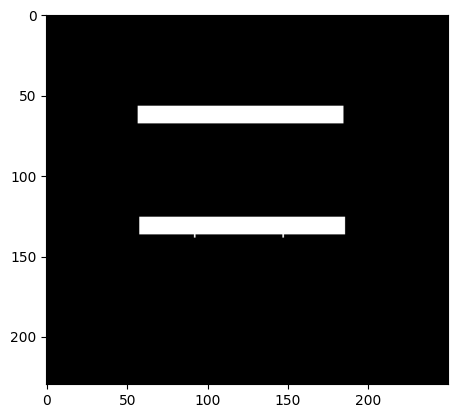

In [7]:
plt.imshow(rect_image, cmap='gray', vmin=0, vmax=255)

In [8]:
sk_image_zhang = skeletonize(rect_image, method='zhang')
sk_image_lee = skeletonize(rect_image, method='lee')

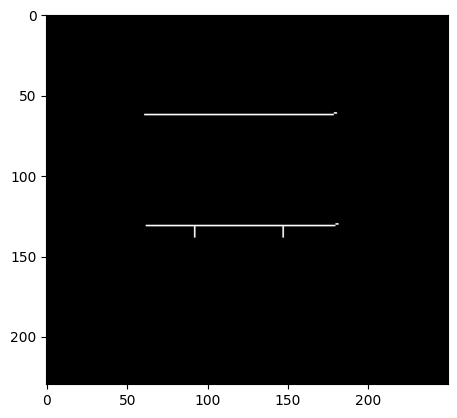

In [9]:
plt.imshow(sk_image_zhang, cmap='gray', vmin=0, vmax=1)

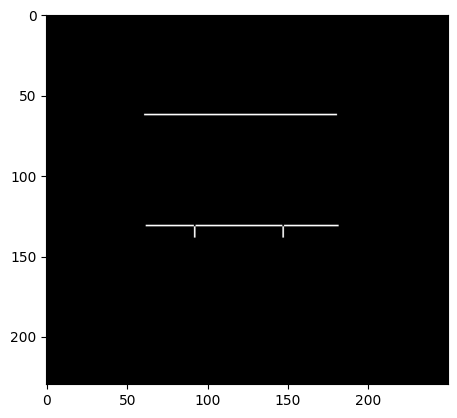

In [10]:
plt.imshow(sk_image_lee, cmap='gray', vmin=0, vmax=1)

## Explique cómo funcionan ambos algoritmos en términos generales

Utilizando el método Zhang, la conectividad de las líneas se mantiene en gran medida, aunque genera pequeños rastros en los extremos, lo que puede afectar la limpieza del esqueleto. Por otro lado, el método Lee muestra una ligera pérdida de conectividad en la línea inferior, dejando pequeños fragmentos desconectados.

- El método *skeletonize* zhang elimina píxeles en los bordes de un objeto de forma iterativa hasta que no se pueden eliminar más. Usa una máscara para clasificar los píxeles según sus vecinos y una tabla de búsqueda para eliminarlos de manera selectiva.

- El método *skeletonize* lee utiliza una estructura *octree* para analizar un vecindario 3x3x3 de píxeles. Elimina píxeles en varias pasadas, primero identificando candidatos y luego verificando su eliminación para mantener la conectividad del objeto.

In [11]:
th_image = thin(rect_image)

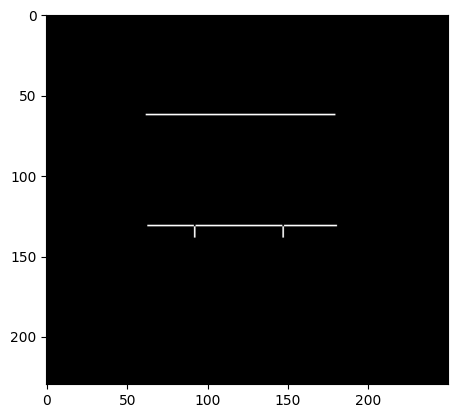

In [12]:
plt.imshow(th_image, cmap='gray', vmin=0, vmax=1)

##  Compare el resultado con los de la esqueletización.

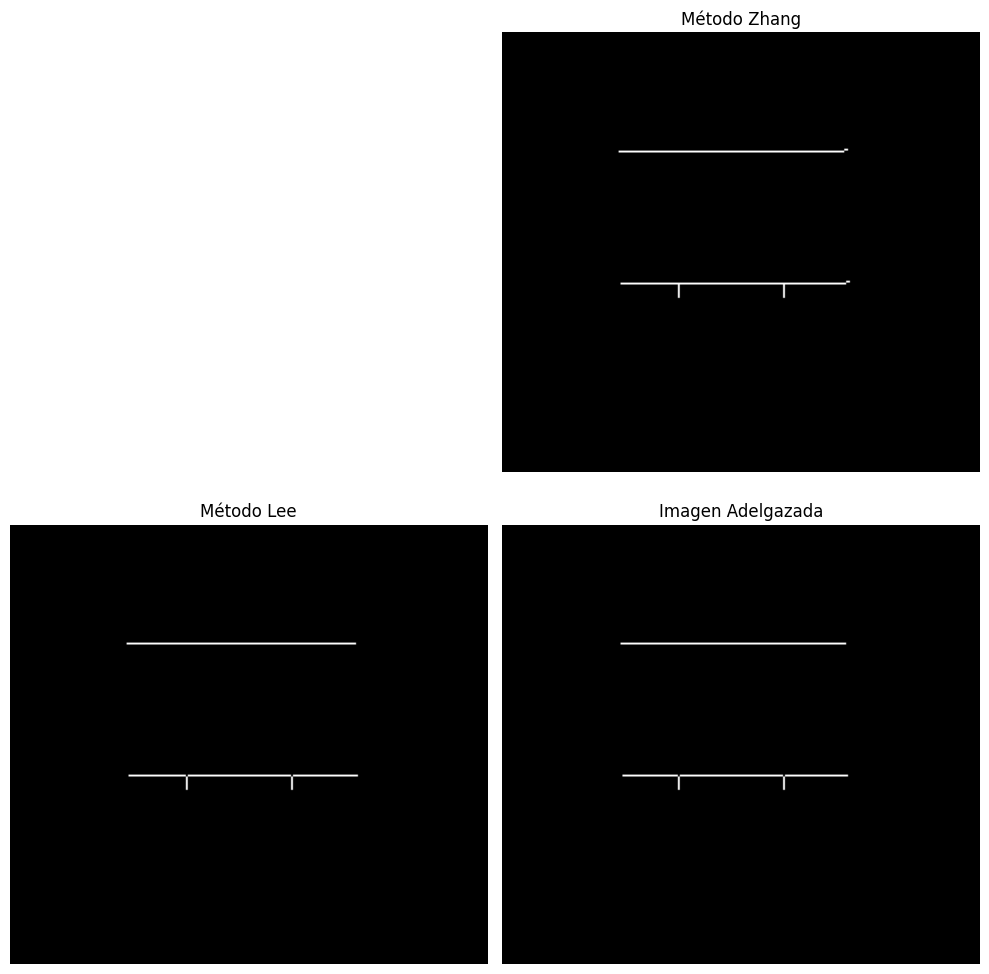

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 2)
plt.imshow(sk_image_zhang, cmap='gray', vmin=0, vmax=1)
plt.title("Método Zhang")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sk_image_lee, cmap='gray', vmin=0, vmax=1)
plt.title("Método Lee")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(th_image, cmap='gray', vmin=0, vmax=1)
plt.title("Imagen Adelgazada")
plt.axis("off")

plt.tight_layout()
plt.show()


Utilizando el metodo de adelgazamiento, se obtienen resultados similares a los del metodo lee, manteniendo una ligera pérdida de conectividad en la línea inferior, dejando pequeños fragmentos desconectados.

In [4]:
angio_image = cv2.imread('images/angio.png', cv2.IMREAD_GRAYSCALE)

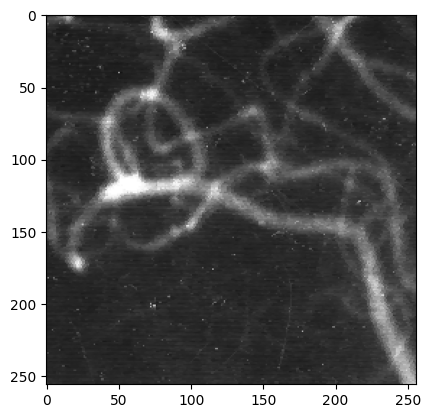

In [5]:
plt.imshow(angio_image, cmap='gray', vmin=0, vmax=255)

In [6]:
thres_value, thres_image = cv2.threshold(angio_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

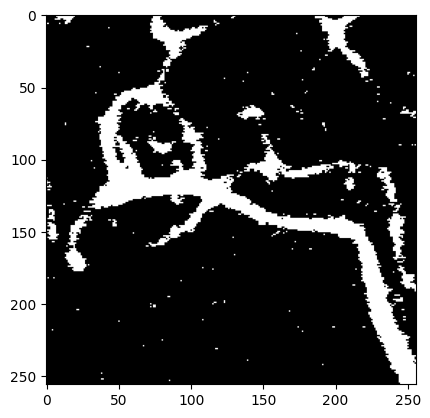

In [7]:
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

In [8]:
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

In [9]:
closing_image = closing(thres_image, footprint=kernel)
opening_image = opening(closing_image, footprint=kernel)

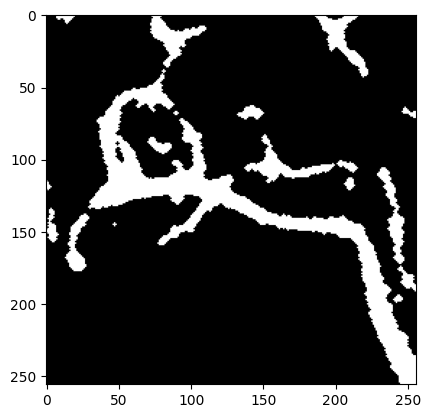

In [10]:
plt.imshow(opening_image, cmap='gray', vmin=0, vmax=255)

In [11]:
sk_image_lee_angio = skeletonize(opening_image, method='lee')
sk_image_zhang_angio = skeletonize(opening_image, method='zhang')

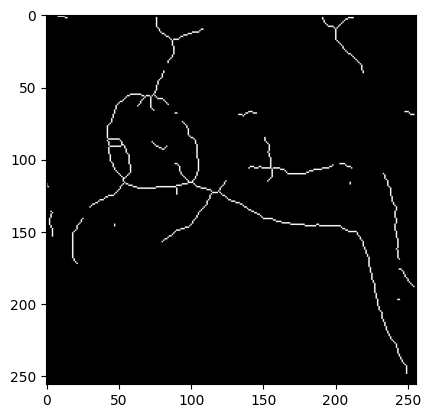

In [13]:
plt.imshow(sk_image_lee_angio, cmap='gray', vmin=0, vmax=1)

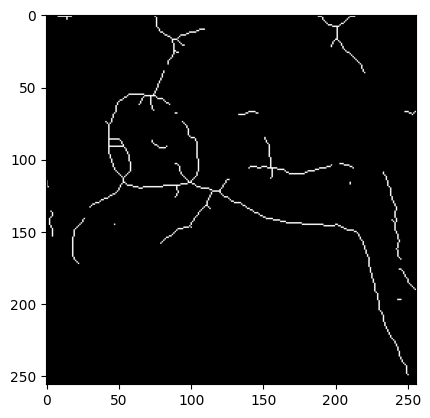

In [14]:
plt.imshow(sk_image_zhang_angio, cmap='gray', vmin=0, vmax=1)

In [16]:
th_image_angio = thin(opening_image)

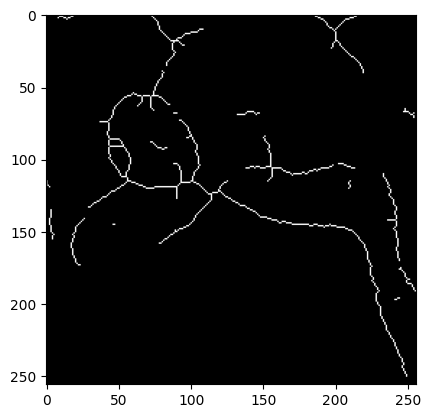

In [17]:
plt.imshow(th_image_angio, cmap='gray', vmin=0, vmax=1)

## Compare los resultados de estos dos tratamientos

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

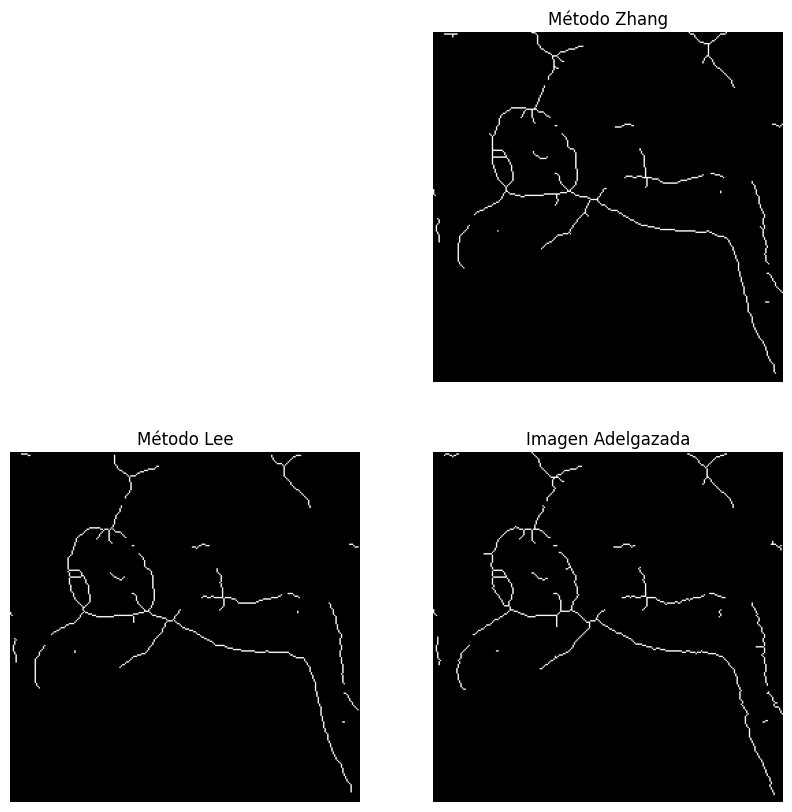

In [18]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 2)
plt.imshow(sk_image_zhang_angio, cmap='gray', vmin=0, vmax=1)
plt.title("Método Zhang")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sk_image_lee_angio, cmap='gray', vmin=0, vmax=1)
plt.title("Método Lee")
plt.axis("off")


plt.subplot(2, 2, 4)
plt.imshow(th_image_angio, cmap='gray', vmin=0, vmax=1)
plt.title("Imagen Adelgazada")
plt.axis("off")


Observando los resultados obtenidos, se puede concluir que el método Zhang preserva mejor la conectividad de las líneas en comparación con el método Lee. En la parte superior de la imagen procesada con Zhang, se pueden identificar fragmentos del objeto que no aparecen al aplicar el método Lee, lo que sugiere que Zhang retiene más detalles estructurales. De manera similar, en la imagen adelgazada, se hace visibles ciertos fragmentos que no son detectados por los otros dos métodos, lo que indica una mayor conservación de la estructura original, aunque con la posible presencia de pequeños rastros adicionales.

In [ ]:
thinned_overlay = (th_image_angio * 255).astype(np.uint8)
thinned_overlay = cv2.max(thinned_overlay, angio_image)

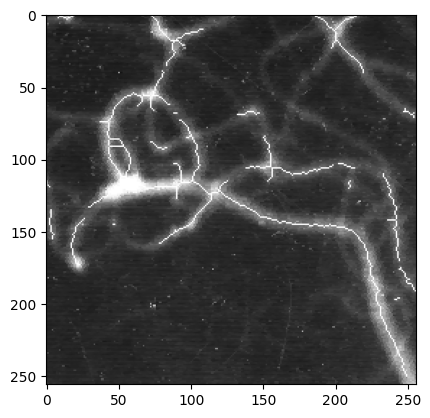

In [71]:
plt.imshow(thinned_overlay, cmap='gray', vmin=0, vmax=255)

## Describa de forma cualitativa el resultado obtenido.

Las líneas presentan cierta continuidad, pero también se observan interrupciones y fragmentos desconectados, lo que indica que el procesamiento aplicado puede haber eliminado o reducido la conectividad en algunas áreas.